In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Jambi.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       362 non-null    float64       
 2   Tx       363 non-null    float64       
 3   Tavg     364 non-null    float64       
 4   RH_avg   364 non-null    float64       
 5   RR       317 non-null    float64       
 6   ss       364 non-null    float64       
 7   ff_x     364 non-null    float64       
 8   ddd_x    364 non-null    float64       
 9   ff_avg   364 non-null    float64       
 10  ddd_car  364 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-2-d84ba8052f3c>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,16.6,29.6,NaN,21.8
1,2023-02-01,16.7,26.7,0.0,21.0
2,2023-03-01,18.8,27.5,12.6,22.3
3,2023-04-01,18.4,27.8,0.6,21.8
4,2023-05-01,18.5,29.7,8888.0,22.9
...,...,...,...,...,...
360,2023-12-16,20.4,31.0,8888.0,25.2
361,2023-12-17,20.9,27.8,8888.0,23.7
362,2023-12-18,21.0,28.2,23.7,23.4
363,2023-12-19,20.8,29.1,19.8,23.0


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,16.6,29.6,NaN,21.8
1,31,31,2023-01-02,19.5,27.9,19.0,23.0
2,59,60,2023-01-03,19.0,28.1,3.2,22.4
3,90,92,2023-01-04,19.0,26.6,0.2,22.1
4,120,123,2023-01-05,21.0,30.3,2.8,24.2
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,20.4,31.0,0.0,25.2
350,350,361,2023-12-17,20.9,27.8,0.0,23.7
351,351,362,2023-12-18,21.0,28.2,23.7,23.4
352,352,363,2023-12-19,20.8,29.1,19.8,23.0


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          3
Tx          2
RR         47
Tavg        1
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

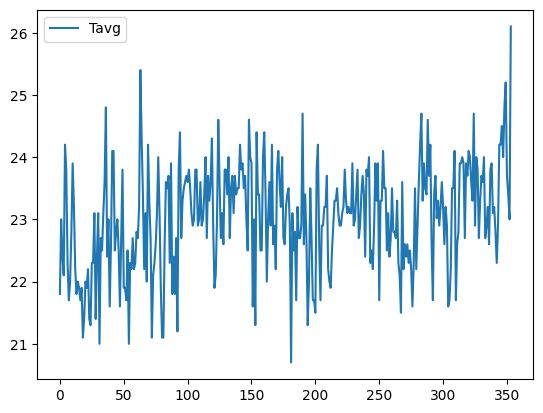

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

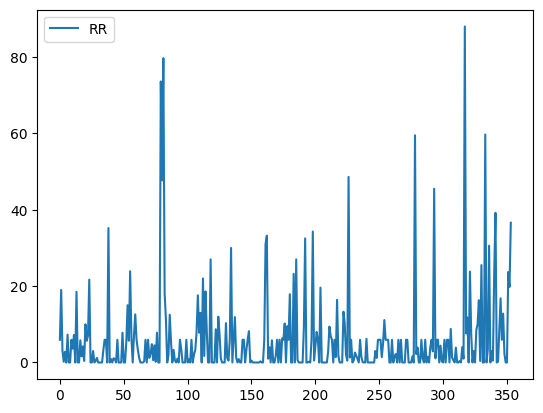

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,16.6,29.6,5.945277,21.8,27.9,23.0,19.0
1,31,31,2023-01-02,19.5,27.9,19.000000,23.0,28.1,22.4,3.2
2,59,60,2023-01-03,19.0,28.1,3.200000,22.4,26.6,22.1,0.2
3,90,92,2023-01-04,19.0,26.6,0.200000,22.1,30.3,24.2,2.8
4,120,123,2023-01-05,21.0,30.3,2.800000,24.2,30.2,23.8,0.0
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,20.4,31.0,0.000000,25.2,27.8,23.7,0.0
350,350,361,2023-12-17,20.9,27.8,0.000000,23.7,28.2,23.4,23.7
351,351,362,2023-12-18,21.0,28.2,23.700000,23.4,29.1,23.0,19.8
352,352,363,2023-12-19,20.8,29.1,19.800000,23.0,30.0,26.1,36.6


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,5.945277,21.8,23.0,19.0
1,19.000000,23.0,22.4,3.2
2,3.200000,22.4,22.1,0.2
3,0.200000,22.1,24.2,2.8
4,2.800000,24.2,23.8,0.0
...,...,...,...,...
349,0.000000,25.2,23.7,0.0
350,0.000000,23.7,23.4,23.7
351,23.700000,23.4,23.0,19.8
352,19.800000,23.0,26.1,36.6


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,5.945277,21.8,23.0,19.0
1,19.000000,23.0,22.4,3.2
2,3.200000,22.4,22.1,0.2
3,0.200000,22.1,24.2,2.8
4,2.800000,24.2,23.8,0.0
...,...,...,...,...
348,2.300000,24.8,25.2,0.0
349,0.000000,25.2,23.7,0.0
350,0.000000,23.7,23.4,23.7
351,23.700000,23.4,23.0,19.8


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,5.945277,21.8,23.0,19.0,0
1,19.000000,23.0,22.4,3.2,1
2,3.200000,22.4,22.1,0.2,2
3,0.200000,22.1,24.2,2.8,3
4,2.800000,24.2,23.8,0.0,4
...,...,...,...,...,...
348,2.300000,24.8,25.2,0.0,348
349,0.000000,25.2,23.7,0.0,349
350,0.000000,23.7,23.4,23.7,350
351,23.700000,23.4,23.0,19.8,351


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
282,282,24.2
283,283,24.7
284,284,23.3
285,285,23.9
286,286,23.5
...,...,...
348,348,24.8
349,349,25.2
350,350,23.7
351,351,23.4


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([23.48552321, 23.64848701, 23.19623163, 23.39157538, 23.26311957,
       23.23180363, 23.62142712, 23.33107153, 23.49403533, 22.97702004,
       22.68666444, 23.23818772, 23.3363916 , 23.11703342, 23.2089998 ,
       23.08054399, 23.17874787, 23.30933172, 23.1808759 , 22.98766018,
       23.18300393, 23.08692808, 22.66705266, 22.70049663, 22.86346042,
       23.28546387, 23.28652789, 23.48187164, 22.7058167 , 22.99830032,
       23.06412425, 23.42136779, 23.4224318 , 23.45587577, 23.42455983,
       23.03706436, 23.42668786, 23.36299196, 23.4935758 , 23.46225986,
       23.33380404, 23.23772819, 23.6921116 , 23.11033639, 23.46757993,
       23.40388403, 23.04876852, 23.24411228, 23.37469612, 23.34338017,
       23.47396401, 23.05408859, 23.11991252, 23.21811641, 23.02490068,
       23.41452417, 23.44796814, 23.18999251, 23.22343648, 23.09498067,
       22.9341449 , 23.12948865, 23.5514921 , 23.55255611, 23.65076   ,
       23.48992423, 23.7500279 , 23.88061174, 23.3959764 , 23.29

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.5983365625426296 0.6051055655637556


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,24.2
283,283,24.7
284,284,23.3
285,285,23.9
286,286,23.5
...,...,...
348,348,24.8
349,349,25.2
350,350,23.7
351,351,23.4


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,23.485523
283,23.648487
284,23.196232
285,23.391575
286,23.263120
...,...
348,23.750028
349,23.880612
350,23.395976


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-26-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,21.8,NaN
1,23.0,NaN
2,22.4,NaN
3,22.1,NaN
4,24.2,NaN
...,...,...
348,24.8,23.750028
349,25.2,23.880612
350,23.7,23.395976
351,23.4,23.299901


<Axes: >

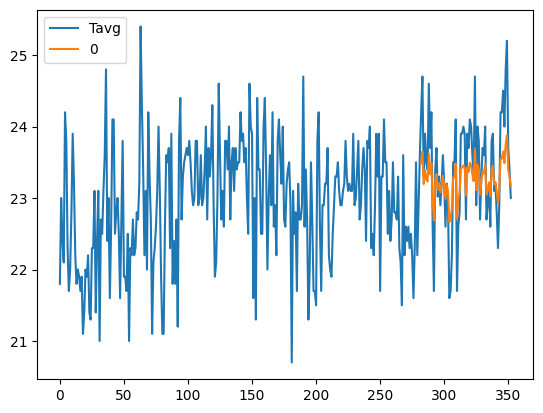

In [27]:
kan.plot()

In [28]:
new_data = [[354,23.0],[355,23.0],[356,23.0],[357,23.0],[358,23.0],[359,23.0],[360,23.0]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.17357276, 23.17463678, 23.17570079, 23.17676481, 23.17782882,
       23.17889284, 23.17995685])

In [29]:
kan.to_json('Prediksi Jambi.json')